In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('Resources/lending_data.csv')
# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
# No null => no imputatiom. Good datatype => No encoding. Only need Scalar

In [5]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [6]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [7]:
75036 / 77536

0.9677569129178704

In [8]:
# Feature selection
# correlation analysis
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


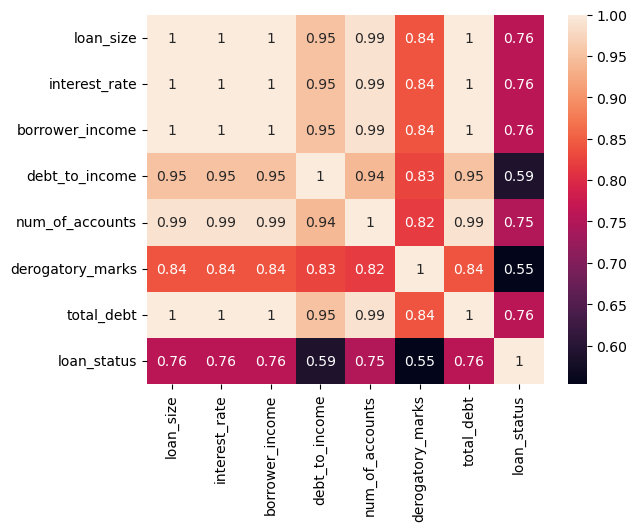

In [9]:
sns.heatmap(corrs, annot=True)
plt.show()

# Preprocessing
### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [10]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [11]:
# Separate the y variable, the labels 
y=df.loan_status
loan_status_labels = ["healthy loan", "high risk loan"]

# Review the y variable Series
print(y[:-1])
print(y[:1])
y.value_counts()

0        0
1        0
2        0
3        0
4        0
        ..
77530    1
77531    1
77532    1
77533    1
77534    1
Name: loan_status, Length: 77535, dtype: int64
0    0
Name: loan_status, dtype: int64


loan_status
0    75036
1     2500
Name: count, dtype: int64

In [12]:
75036 / 77536

0.9677569129178704

In [13]:
# Separate the X variable, the features
num_cols = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Scaled Dataframe as X 
X = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [14]:
# Review the X variable DataFrame
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [15]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify ensures same % of the target classes in the train/test

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(77536, 7)
(58152, 7)
(19384, 7)


---

# Machine Learning
## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [17]:
# Make a prediction using the testing data
predictions = lr.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
36831,0,0
75818,1,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [18]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(
    cm, index=["Actual healthy loan", "Actual high-risk loan"], columns=["Predicted healthy loan", "Predicted high-risk loan"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Print the classification report for the model
print("--Logistic Regression Model")
print("* Confusion Matrix")
display(df_cm)
print(f"* Accuracy Score : {acc_score}")
print(f"""* Classification Report""")
print(classification_report(y_test, predictions, target_names=loan_status_labels))

--Logistic Regression Model
* Confusion Matrix


,Predicted healthy loan,Predicted high-risk loan
Actual healthy loan,18669,90
Actual high-risk loan,14,611


* Accuracy Score : 0.9946347503095336
* Classification Report
                precision    recall  f1-score   support

  healthy loan       1.00      1.00      1.00     18759
high risk loan       0.87      0.98      0.92       625

      accuracy                           0.99     19384
     macro avg       0.94      0.99      0.96     19384
  weighted avg       1.00      0.99      0.99     19384



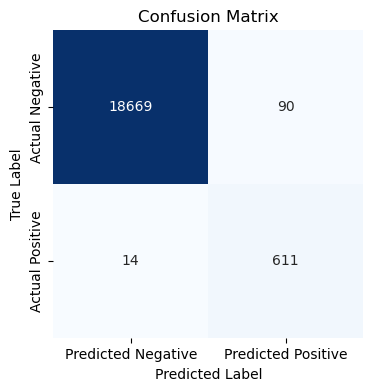

In [19]:
# VISUALIZE TEST RESULTS
# Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

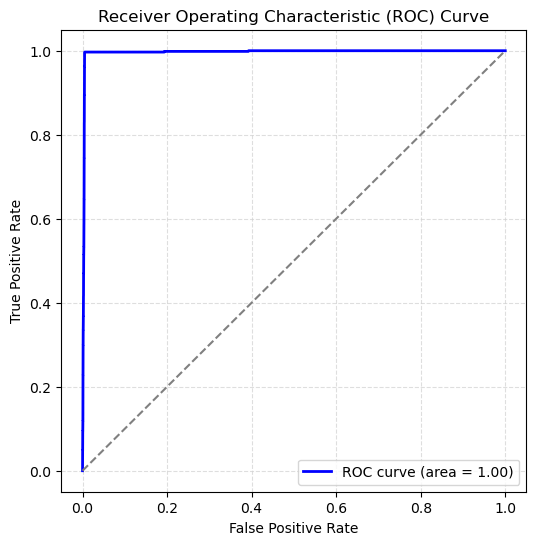

In [20]:
# Evaluate the model
test_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test.values, test_proba)
test_auc = roc_auc_score(y_test, test_proba)

# Set figure size
plt.figure(figsize=(6, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Titles and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add grid and legend
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")

# Display the plot
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model demonstrates strong predictive performance for both the 0 (healthy loan) and 1 (high-risk loan) labels based on the provided confusion matrix and classification report.

    "0" (healthy loan) label:
    The model achieved a precision of 1.00, indicating that all predicted healthy loans were indeed healthy.
    The recall was also 1.00, meaning the model correctly identified all actual healthy loans.
    The f1-score, which is the harmonic mean of precision and recall, is 1.00, reflecting perfect performance for this class.

    "1" (high-risk loan) labe:
    The precision for high-risk loans is 0.87, suggesting that 87% of the loans predicted as high-risk were actually high-risk.
    The recall is 0.98, indicating that the model successfully identified 98% of the actual high-risk loans.
    The f1-score is 0.92, which shows a good balance between precision and recall for this class.

    Confusion Metric:
    True Positives (TP): 611 correctly identifies high-risk loans 
    True Negatives (TN): 18669 correctly identifies healthy loans 
    False Positives (FP): 90 incorrectly identifies high-risk loans when they are not.
    False Negatives (FN): 14 incorrectly identifies healthy loans when they are actuially high-risk.

- The overall accuracy of the model is classified approximately 99.46% of the total loans.
- The macro average precision and recall are 0.94 and 0.99, respectively, showing that while the model performs exceptionally well on healthy loans, there is some room for improvement in identifying high-risk loans.
- The weighted averages reflect the model's strong performance across the entire dataset, particularly due to the high number of healthy loans.

In summary, the logistic regression model is highly effective at predicting healthy loans and performs well for high-risk loans, though with slightly lower precision.

---